<a href="https://colab.research.google.com/github/HaeminJeong/Python-DataScienceStudy/blob/main/Day1_Chapter0_Chapter1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1일차 공부
- Chapter0 : pandas numpy matpolib
- Chapter1 : 


## 코랩에 깃 클론하기

In [1]:
# 1. 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!git clone https://github.com/yoonkt200/python-data-analysis.git '/content/drive/MyDrive/PytorchStudy/python-data'

Cloning into '/content/drive/MyDrive/PytorchStudy/python-data'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 904 (delta 25), reused 34 (delta 12), pack-reused 852
Receiving objects: 100% (904/904), 90.70 MiB | 12.44 MiB/s, done.
Resolving deltas: 100% (514/514), done.
Checking out files: 100% (68/68), done.


In [57]:
pwd

'/content'

In [58]:
cd /content/drive/MyDrive/PytorchStudy

/content/drive/MyDrive/PytorchStudy


In [59]:
pwd

'/content/drive/MyDrive/PytorchStudy'

## Chapter0 :기본 라이브러리
###

## Chapter1 멕시코풍 프랜차이즈 Chipotle의 주문 데이터 분석하기

In [5]:
import pandas as pd

# read_csv 함수로 데이터를 Dataframe 형태로 불러옵니다.
file_path = '/content/drive/MyDrive/PytorchStudy/python-data/data/chipotle.tsv'
chipo = pd.read_csv(file_path, sep = '\t')

In [6]:
print(chipo.shape)
print("------------------------------------")
print(chipo.info())

(4622, 5)
------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


In [9]:
chipo.tail(10)

,order_id,quantity,item_name,choice_description,item_price
4612,1831,1,Carnitas Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$9.25
4613,1831,1,Chips,NaN,$2.15
4614,1831,1,Bottled Water,NaN,$1.50
4615,1832,1,Chicken Soft Tacos,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]",$8.75
4616,1832,1,Chips and Guacamole,NaN,$4.45
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75


In [8]:
print(chipo.columns)
print("------------------------------------")
print(chipo.index)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')
------------------------------------
RangeIndex(start=0, stop=4622, step=1)


In [10]:
chipo['order_id'] = chipo['order_id'].astype(str) # order_id는 숫자의 의미를 가지지 않기 때문에 str으로 변환

In [14]:
print(chipo.describe())

          quantity
count  4622.000000
mean   1.075725   
std    0.410186   
min    1.000000   
25%    1.000000   
50%    1.000000   
75%    1.000000   
max    15.000000  


In [15]:
print(len(chipo['order_id'].unique())) # order_id의 개수를 출력합니다.
print(len(chipo['item_name'].unique())) # item_name의 개수를 출력합니다.

1834
50


### step2. 인사이트의 발견 : 탐색과 시각화
- 가장 많이 주문한 item은 무엇인지
- item당 주문의 총량은 얼마인지

### 가장 많이 주문한 item

In [18]:
# 가장 많이 주문한 item: top 10을 출력합니다.
item_count = chipo['item_name'].value_counts()[:10]
for idx, (val,cnt) in enumerate(item_count.iteritems(), 1):
  print("Top", idx, ":", val, cnt)

Top 1 : Chicken Bowl 726
Top 2 : Chicken Burrito 553
Top 3 : Chips and Guacamole 479
Top 4 : Steak Burrito 368
Top 5 : Canned Soft Drink 301
Top 6 : Chips 211
Top 7 : Steak Bowl 211
Top 8 : Bottled Water 162
Top 9 : Chicken Soft Tacos 115
Top 10 : Chips and Fresh Tomato Salsa 110


In [20]:
chipo['item_name'].value_counts().index.tolist()[0]

'Chicken Bowl'

### item당 주문 개수와 총량 구하기

In [16]:
chipo.head(1)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39


In [21]:
# item당 주문 개수를 출렵합니다.
order_count = chipo.groupby('item_name')['order_id'].count()
order_count[:10]

item_name
6 Pack Soft Drink        54 
Barbacoa Bowl            66 
Barbacoa Burrito         91 
Barbacoa Crispy Tacos    11 
Barbacoa Salad Bowl      10 
Barbacoa Soft Tacos      25 
Bottled Water            162
Bowl                     2  
Burrito                  6  
Canned Soda              104
Name: order_id, dtype: int64

In [24]:
# item당 주문 총량을 출력합니다
item_quantity = chipo.groupby('item_name')['quantity'].sum()
item_quantity[:10]

item_name
6 Pack Soft Drink        55 
Barbacoa Bowl            66 
Barbacoa Burrito         91 
Barbacoa Crispy Tacos    12 
Barbacoa Salad Bowl      10 
Barbacoa Soft Tacos      25 
Bottled Water            211
Bowl                     4  
Burrito                  6  
Canned Soda              126
Name: quantity, dtype: int64

### 시각화로 분석 결과 살펴보기

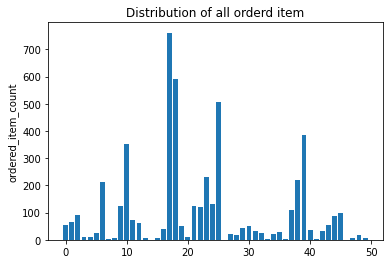

In [27]:
#&matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

item_name_list = item_quantity.index.tolist()
x_pos = np.arange(len(item_name_list))
order_cnt = item_quantity.values.tolist()

plt.bar(x_pos, order_cnt, align='center')
plt.ylabel('ordered_item_count')
plt.title('Distribution of all orderd item')

plt.show()

### 미니 퀴즈 1.1
- pandas에서 유용하게 사용되는 함수 value_counts()와 unique의 차이점은 무엇일까요?

- 각 함수는 어떤 데이터 타입에 적용이 되는지, 어떤 기능을 가지고 있는지, 정확히 어떤 결과값을 반환하는지 실행해봅시다.


In [28]:
print(chipo['item_name'].value_counts()[:10])

Chicken Bowl                    726
Chicken Burrito                 553
Chips and Guacamole             479
Steak Burrito                   368
Canned Soft Drink               301
Chips                           211
Steak Bowl                      211
Bottled Water                   162
Chicken Soft Tacos              115
Chips and Fresh Tomato Salsa    110
Name: item_name, dtype: int64


In [29]:
print(type(chipo['item_name'].value_counts()))

<class 'pandas.core.series.Series'>


In [30]:
print(chipo['item_name'].unique()[:10])

['Chips and Fresh Tomato Salsa' 'Izze' 'Nantucket Nectar'
 'Chips and Tomatillo-Green Chili Salsa' 'Chicken Bowl' 'Side of Chips'
 'Steak Burrito' 'Steak Soft Tacos' 'Chips and Guacamole'
 'Chicken Crispy Tacos']


## step3 데이터 전처리

In [31]:
print(chipo.info())
print('-------------')
chipo['item_price'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   object
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(1), object(4)
memory usage: 180.7+ KB
None
-------------


0    $2.39  
1    $3.39  
2    $3.39  
3    $2.39  
4    $16.98 
Name: item_price, dtype: object

In [ ]:
# columns 단위에 apply함수로 전처리를 적용합니다.
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))

In [35]:
chipo.describe()

,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


In [36]:
chipo['item_price'].head()

0    2.39 
1    3.39 
2    3.39 
3    2.39 
4    16.98
Name: item_price, dtype: float64

## step4 탐색적 분석 : 스무고개로 분석하는 개념적 탐색

데이터를 이해하기 윟나 조금 더 북잡한 질문들로 탐색적 데이터 분석 연습하기
- 주문당 평균 계산금액 출력하기
- 한 주문에 10달러 이상 사용한 주문의 id들 출력하기
- 각 아이템의 가격 구하기
- 가장 비싼 주문에서 item이 몇개 팔렸는지 구하기
- “Veggie Salad Bowl”이 몇 번 주문되었는지 구하기
- “Chicken Bowl”을 2개 이상 주문한 주문 횟수 구하기

### 주문당 평균 계산금액 출력하기

In [37]:
chipo.groupby('order_id')['item_price'].sum().mean()

18.811428571428717

In [38]:
chipo.groupby('order_id')['item_price'].sum().describe()[:10]

count    1834.000000
mean     18.811429  
std      11.652512  
min      10.080000  
25%      12.572500  
50%      16.200000  
75%      21.960000  
max      205.250000 
Name: item_price, dtype: float64

### 한 주문에 10달러 이상 사용한 주문의 id들 출력하기

In [40]:
chipo_orderid_group = chipo.groupby('order_id').sum()
results = chipo_orderid_group[chipo_orderid_group.item_price >= 10]

print(results[:10])
print(results.index.values)
print(chipo_orderid_group.head())

          quantity  item_price
order_id                      
1         4         11.56     
10        2         13.20     
100       2         10.08     
1000      2         20.50     
1001      2         10.08     
1002      2         10.68     
1003      2         13.00     
1004      2         21.96     
1005      3         12.15     
1006      8         71.40     
['1' '10' '100' ... '997' '998' '999']
          quantity  item_price
order_id                      
1         4         11.56     
10        2         13.20     
100       2         10.08     
1000      2         20.50     
1001      2         10.08     


### 각 아이템의 가격 구하기

In [41]:
chipo_one_item = chipo[chipo.quantity == 1]
price_per_item = chipo_one_item.groupby('item_name').min()
price_per_item.sort_values(by = "item_price", ascending = False)[:10]

,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,1032,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,1035,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Guacamole]]",9.39
Carnitas Soft Tacos,1011,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice, Fajita Veggies, Cheese, Lettuce]]",8.99
Carnitas Crispy Tacos,1774,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice, Black Beans, Cheese, Sour Cream, Guacamole, Lettuce]]",8.99
Steak Soft Tacos,1054,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Corn Salsa (Medium)], [Black Beans, Rice, Cheese, Sour Cream]]",8.99
Carnitas Bowl,1007,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Rice, Sour Cream, Cheese]]",8.99
Barbacoa Soft Tacos,1103,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Lettuce]]",8.99


In [56]:
print(len(chipo['item_name'].unique()))
print(len(chipo[chipo.quantity == 1]))

50
4355


In [42]:
chipo_one_item.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sour Cream, Guacamole, Lettuce]]",10.98


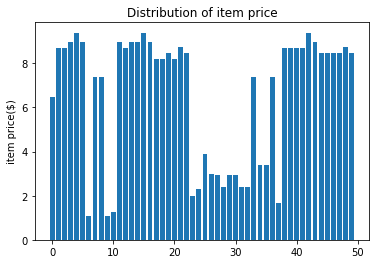

In [43]:
# 아이템 가격 분포 그래프를 출력합니다.
item_name_list = price_per_item.index.tolist()
x_pos = np.arange(len(item_name_list))
item_price = price_per_item['item_price'].tolist()
 
plt.bar(x_pos, item_price, align='center')
plt.ylabel('item price($)')
plt.title('Distribution of item price')
 
plt.show()

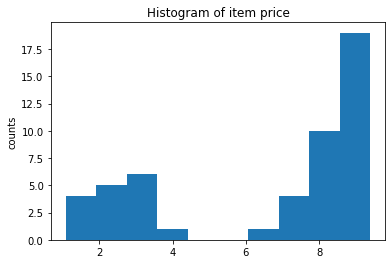

In [44]:

# 아이템 가격 히스토그램을 출력합니다.
plt.hist(item_price)
plt.ylabel('counts')
plt.title('Histogram of item price')

plt.show()

### 가장 비싼 주문에서 item이 총 몇개 팔렸는지 구하기

In [45]:
chipo.groupby('order_id').sum().sort_values(by='item_price', ascending=False)[:5]

,quantity,item_price
order_id,,
926,23,205.25
1443,35,160.74
1483,14,139.00
691,11,118.25
1786,20,114.30


### Veggie Salad Bowl이 몇 번 주문되었는지 구하기

In [47]:
chipo_salad = chipo[chipo['item_name']=='Veggie Salad Bowl']
chipo_salad = chipo_salad.drop_duplicates(['item_name', 'order_id'])

print(len(chipo_salad))
chipo_salad.head()

18


,order_id,quantity,item_name,choice_description,item_price
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice, Black Beans, Cheese, Sour Cream, Guacamole, Lettuce]]",11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettuce, Guacamole, Sour Cream, Cheese, Black Beans, Rice]]",11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice, Black Beans, Cheese, Guacamole, Lettuce]]",11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole, Fajita Vegetables, Cheese, Sour Cream, Black Beans]]",11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettuce]]",8.75


In [49]:
# 이 코드하고 다른게 뭔지??
chipo_salad = chipo[chipo['item_name']=='Veggie Salad Bowl'].value_counts()

In [52]:
chipo_salad

order_id  quantity  item_name          choice_description                                                                                    item_price
913       1         Veggie Salad Bowl  [Fresh Tomato Salsa, [Fajita Vegetables, Rice, Pinto Beans, Cheese, Lettuce]]                         8.75          1
896       1         Veggie Salad Bowl  [Roasted Chili Corn Salsa, Fajita Vegetables]                                                         8.75          1
128       1         Veggie Salad Bowl  [Fresh Tomato Salsa, [Fajita Vegetables, Lettuce, Guacamole, Sour Cream, Cheese, Black Beans, Rice]]  11.25         1
1289      1         Veggie Salad Bowl  [Tomatillo Red Chili Salsa, [Fajita Vegetables, Rice, Black Beans, Cheese, Guacamole]]                11.25         1
1321      1         Veggie Salad Bowl  [Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream]]                                         8.75          1
1646      1         Veggie Salad Bowl  [Tomatillo Red Chili Sal

### Chicken Bowl을 2개 이상 주문한 횟숫 구하기

In [54]:
chipo_chicken = chipo[chipo['item_name'] == "Chicken Bowl"]
chipo_chicken_ordersum = chipo_chicken.groupby('order_id').sum()['quantity']
chipo_chicken_result = chipo_chicken_ordersum[chipo_chicken_ordersum >= 2]

print(len(chipo_chicken_result))
chipo_chicken_result.head(5)

114


order_id
1004    2
1023    2
1072    2
1078    2
1091    2
Name: quantity, dtype: int64